In [1]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *
import corner.corner as corner

In [2]:
df1_data = {'App Mag': [13.233, 14.053, 14.966], 
            'Errors': [0.1, 0.1, 0.1], 
            'Filter': ['H', "I", "r"]}
df1 = pd.DataFrame(df1_data)
df1

,App Mag,Errors,Filter
0,13.233,0.1,H
1,14.053,0.1,I
2,14.966,0.1,r


In [3]:
s = System(df1, 100, 0.1)
s.init_age_prior

UniformPrior(minval=0.0, maxval=5650000000.0)

In [4]:
mdf = maketable('WD', filters=["H", "I", "r"])

In [5]:
mags = np.zeros((2, 2))
mags[:] = 2.

if np.all(mags==2):
    chi = np.zeros_like(mags)
    chi[:] = -np.inf
    print(chi)

[[-inf -inf]
 [-inf -inf]]


In [5]:
result = findMags(mdf, 1.13487333e+00, 9.10543304e+09, 1.00003039e+02, filters=['H', 'I', 'r'])
result
print(chi_squared(result, np.array(df1_data["App Mag"]),  np.array(df1_data["Errors"])))

(1.1, 1.2)
Interpolation error: 1.13487333 M$\odot$, 9105433040.0 yrs
[-inf -inf -inf]


In [6]:
sampler = MCMCSampler(s, num_threads=5, num_temps=1, num_walkers=200, table_type='WD', filters=["H", "I", "r"])

In [7]:
sampler.curr_pos

array([[7.29769989e-01, 3.52592245e+09, 1.00013792e+02],
       [4.64389982e-01, 6.69953066e+08, 9.99756865e+01],
       [5.45682105e-01, 5.45142294e+09, 1.00013104e+02],
       [8.38181859e-01, 2.40418566e+09, 1.00223591e+02],
       [6.33378013e-01, 4.35425984e+09, 1.00071670e+02],
       [1.02489074e+00, 3.97789040e+09, 9.98361197e+01],
       [9.17346883e-01, 3.15106465e+09, 9.99916758e+01],
       [1.15909898e+00, 1.94260001e+08, 1.00182662e+02],
       [3.44354187e-01, 1.05409941e+09, 1.00027272e+02],
       [3.52367227e-01, 2.80062048e+09, 9.99937235e+01],
       [8.50657365e-01, 9.65689034e+08, 1.00046014e+02],
       [1.11572514e+00, 2.15673266e+09, 9.98277810e+01],
       [7.01529757e-01, 4.61731928e+09, 9.99975579e+01],
       [7.49789798e-01, 3.31670191e+09, 1.00001808e+02],
       [7.25372460e-01, 3.32186152e+09, 1.00075847e+02],
       [6.63992292e-01, 9.45998454e+08, 1.00104557e+02],
       [8.00335361e-01, 9.60026464e+08, 1.00126124e+02],
       [4.23831255e-01, 5.30214

In [9]:
sampler.run_sampler(100000, 100, 2, "test2.hdf5")

Starting Burn in


TypeError: only size-1 arrays can be converted to Python scalars

[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

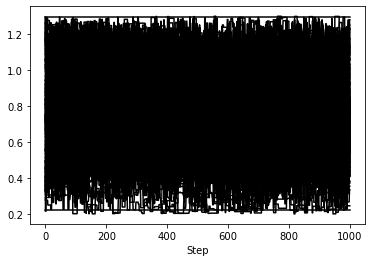

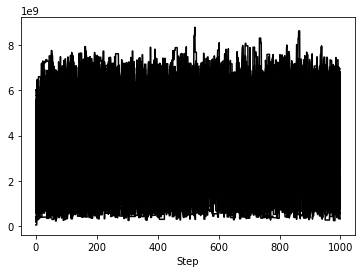

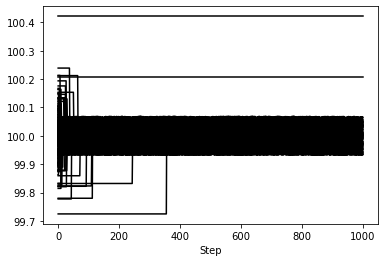

In [8]:
sampler.examine_chains()

In [ ]:
test_params = np.array([2.17289824e-01, 1.36642406e+10, 9.99720353e+01])
df1["App Mag"]

#findMags(df1, test_params[0], test_params[1], test_params[2], filts)

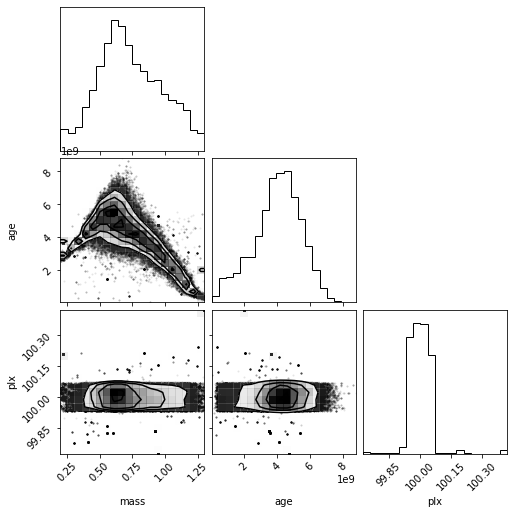

In [11]:
flatchain = np.copy(sampler.results.post)
flatchain.shape
figure = corner(flatchain,
                labels=['mass', 'age', 'plx'])